In [56]:
import pandas as pd
import nltk
import re

In [3]:
file = open("transcripts.txt", "r", encoding="utf-8")
transcripts = file.read()

In [26]:
transcripts_left

'360.  Jon Grunseth\n "There are three things that are extremely important to me: my wife, my family, first and foremost; the Republican Party, the people of Minnesota.\n"And the events of the last three weeks have put enormous pressure on the family and, I think, on the political process and on the people of Minnesota. I therefore decided to withdraw as the Republican candidate for governor."\n\n\n'

In [28]:
number_of_apologies = 360

apologies = {}

transcripts_left = transcripts

for i in range(1, number_of_apologies + 1):
    if i == number_of_apologies: # end of transcripts
        apologies[str(i)] = clean_doc(transcripts_left)
    else:
        end = str(i+1) + '.'
        if transcripts_left.find(end) == -1:
            apologies[str(i)] = 'NULL'# some transcripts are missing
            continue
        else:
            apologies[str(i)] = clean_doc(transcripts_left[:transcripts_left.find(end)])
    transcripts_left = transcripts_left[transcripts_left.find(end):]

In [27]:
def clean_doc(text):
    return text.replace('\n', '').translate(translator).lower()

In [35]:
def hasNumbers(inputString):
    return any(char.isdigit() for char in inputString)

In [36]:
apologies = {k: v.encode('ascii', 'ignore').decode('ascii') for k, v in apologies.items()}

documents = list(apologies.values())

translator = str.maketrans('', '', string.punctuation)
cachedStopWords = stopwords.words("english")

# cleaning documents --> collecting the words for texts

texts = [[word for word in document.lower().split() if word not in cachedStopWords and not hasNumbers(word)] for document in documents]

In [44]:
## removing words that only appear once

from collections import defaultdict
frequency = defaultdict(int)

for text in texts:
    for token in text:
        frequency[token] += 1
        
texts = [[token for token in text if frequency[token] > 1] for text in texts]
documents_cleaned = [' '.join(doc) for doc in texts]

In [22]:
# documents_cleaned = []
# for doc in documents:
#     clean_doc = ' '.join(w for w in doc.split() 
#                               if not any(x.isdigit() for x in w)
#                               and w not in cachedStopWords)
#     documents_cleaned.append(clean_doc[clean_doc.find('.')+1:].replace('\n', '').translate(translator).lower())


In [47]:
documents_cleaned[240]

'david begin im reminded something wrote years ago mr said staring mr clinton whose initially stern expression steadily may impossible objective said must always fair well long day election day seven hours set said end election night coverage unfair im sorry regret'

In [48]:
import os
import tempfile
TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

Folder "/var/folders/vz/kxlz2vjd03s9_z79mzydrgz80000gn/T" will be used to save temporary dictionary and corpus.


In [49]:
from pprint import pprint

import logging
from gensim import corpora

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(TEMP_FOLDER, 'apologies.dict'))

corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'apologies.mm'), corpus)  # store to disk, for later use

2019-02-26 01:19:23,875 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-02-26 01:19:23,959 : INFO : built Dictionary(8028 unique tokens: ['absolute', 'absolutely', 'absolutes', 'accordingly', 'across']...) from 360 documents (total 105733 corpus positions)
2019-02-26 01:19:23,960 : INFO : saving Dictionary object under /var/folders/vz/kxlz2vjd03s9_z79mzydrgz80000gn/T/apologies.dict, separately None
2019-02-26 01:19:23,963 : INFO : saved /var/folders/vz/kxlz2vjd03s9_z79mzydrgz80000gn/T/apologies.dict
2019-02-26 01:19:24,027 : INFO : storing corpus in Matrix Market format to /var/folders/vz/kxlz2vjd03s9_z79mzydrgz80000gn/T/apologies.mm
2019-02-26 01:19:24,029 : INFO : saving sparse matrix to /var/folders/vz/kxlz2vjd03s9_z79mzydrgz80000gn/T/apologies.mm
2019-02-26 01:19:24,029 : INFO : PROGRESS: saving document #0
2019-02-26 01:19:24,091 : INFO : saved 360x8028 matrix, density=1.856% (53628/2890080)
2019-02-26 01:19:24,091 : INFO : saving MmCorpus index to /var/folders

In [12]:
import gensim
import string
from nltk.corpus import stopwords

translator = str.maketrans('', '', string.punctuation)
cachedStopWords = stopwords.words("english")

Need to clean up $documents

In [30]:
# import nltk
# import re
# from nltk.corpus import stopwords
# from nltk.stem.snowball import SnowballStemmer
# stemmer = SnowballStemmer("english")

# def tokenize_and_stem(text):
#     # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
#     tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
#     filtered_tokens = []
#     # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
#     for token in tokens:
#         if re.search('[a-zA-Z]', token):
#             filtered_tokens.append(token)
#     stems = [stemmer.stem(t) for t in filtered_tokens if t not in stopwords.words('english')]
#     return stems


# def tokenize_only(text):
#     # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
#     tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
#     filtered_tokens = []
#     # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
#     for token in tokens:
#         if re.search('[a-zA-Z]', token):
#             filtered_tokens.append(token)
#     filtered_tokens = [word for word in filtered_tokens if word not in stopwords.words('english')]
#     return filtered_tokens

# totalvocab_stemmed = []
# totalvocab_tokenized = []

# for i in documents_cleaned:
#     allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
#     totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
#     allwords_tokenized = tokenize_only(i)
#     totalvocab_tokenized.extend(allwords_tokenized)
    

# vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
# print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 116353 items in vocab_frame


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents_cleaned) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

terms = tfidf_vectorizer.get_feature_names()

(360, 8016)


In [52]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
dist

array([[ 2.33146835e-15,  7.38266557e-01,  8.73960788e-01, ...,
         8.70867888e-01,  7.91268458e-01,  8.80915539e-01],
       [ 7.38266557e-01,  0.00000000e+00,  8.67529426e-01, ...,
         8.84726406e-01,  8.45917811e-01,  8.61773924e-01],
       [ 8.73960788e-01,  8.67529426e-01, -2.22044605e-16, ...,
         9.47675561e-01,  9.42183118e-01,  9.89447891e-01],
       ...,
       [ 8.70867888e-01,  8.84726406e-01,  9.47675561e-01, ...,
        -4.44089210e-16,  8.70312143e-01,  9.64177606e-01],
       [ 7.91268458e-01,  8.45917811e-01,  9.42183118e-01, ...,
         8.70312143e-01, -2.22044605e-16,  8.81642995e-01],
       [ 8.80915539e-01,  8.61773924e-01,  9.89447891e-01, ...,
         9.64177606e-01,  8.81642995e-01,  0.00000000e+00]])

In [60]:
from sklearn.cluster import KMeans

num_clusters = 5

In [61]:
from sklearn.externals import joblib

#uncomment the below to save your model 

joblib.dump(km,  'doc_cluster.pkl')

#km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

NameError: name 'km' is not defined

In [57]:
masterlist = pd.read_csv('apologies_masterlist.csv', header=0, usecols=[0,1,2,3,4,5,6])
re.sub('[^0-9]','', masterlist['Number of apology'][1])
# need to match masterlist and apology 
masterlist['Number of apology'] = masterlist['Number of apology'].apply(lambda x: re.sub('[^0-9]','', str(x)))
#films = { 'title': titles, 'rank': ranks, 'synopsis': synopses, 'cluster': clusters, 'genre': genres }

#frame = pd.DataFrame(films, index = [clusters] , columns = ['rank', 'title', 'cluster', 'genre'])

In [58]:
masterlist = masterlist.dropna()
masterlist.drop_duplicates(subset=['Number of apology'], inplace=True)

masterlist_ind = masterlist.set_index('Number of apology')
masterlist_ind

,Apologizer,Offense,Date of apology,Source of the apology,Transcribed from video,Context
Number of apology,,,,,,
5,Andy Pettite,Steroids,02/18/08,http://www.youtube.com/watch?v=RceLWHew6N8,Yes,Athlete
20,Elizabeth Lambert,physical aggression in soccer game vs. BYU,11/07/09,http://www.youtube.com/watch?v=wHPWDQw3J4Y,Yes,Athlete
58,Jon McCain,For canceling appearance on The Late Show,10/16/08,http://www.tvsquad.com/2009/06/16/letterman-ap...,Yes,Political
63,Kathy Lee Gifford,For comment about Pagan community,07/04/08,http://theresachaze.blogspot.com/2008/07/kathy...,Yes,Celebrity
65,Dominos CEO,For employee prank video posted on YouTube,04/15/09,http://www.youtube.com/watch?v=dem6eA7-A2I,Yes,Organization
84,Tim Donaghy,Betting on games he refereed,12/03/09,http://www.youtube.com/watch?v=kFWDb81lA7Q,Yes,Athlete
86,George W. Bush,Apology for slavery,05/22/07,http://www.raceandhistory.com/cgi-bin/forum/we...,Yes,Political
88,George W. Bush,Apology for Danish political cartoons depictin...,02/08/06,http://www.c-spanvideo.org/program/181732-1,Yes,Political
90,David Vitter,For the “D.C. Madam” scandal,07/17/07,http://www.cbsnews.com/video/watch/?id=3064392n,Yes,Political


In [82]:
WIP = {'apology': list(apologies.keys()), 'text': list(apologies.values()), 'cluster': clusters}
frame = pd.DataFrame(WIP , columns = ['apology', 'text', 'cluster'])

offense = []
for index, row in frame.iterrows():
    if row['apology'] in masterlist_ind.index:
        offense.append(masterlist_ind.loc[row['apology'],'Offense'])
    else:
        offense.append('NULL')
        
context = []
for index, row in frame.iterrows():
    if row['apology'] in masterlist_ind.index:
        context.append(masterlist_ind.loc[row['apology'],'Context'])
    else:
        context.append('NULL')

apologizer = []
for index, row in frame.iterrows():
    if row['apology'] in masterlist_ind.index:
        context.append(masterlist_ind.loc[row['apology'],'Apologizer'])
    else:
        context.append('NULL')
        
df = frame.assign(Context=pd.Series(context).values)
df = df.assign(Offense=pd.Series(offense).values)

df

NameError: name 'clusters' is not defined

,apology,text,Context,Offense
cluster,,,,
1,1,Mark Sanford of South Carolina addressed his ...,Political,Affair with woman on trip to Argentina.
0,2,And thank you for joining me.\n\nMany of you ...,Athlete,Affair
1,3,"Louis Cardinals, I have the chance to do some...",Athlete,Steroids
2,4,Last year I had an affair. I violated the vow...,Political,For having an affair
3,5,I also want to tell any Andy Pettitte fan I a...,Athlete,Steroids
0,6,I did nothing wrong at the Minneapolis airpor...,Political,Bathroom stall foot incident
0,7,I only wanted to help people my entire life. ...,Celebrity,Grabbing mic from Taylor Swift at Grammys
1,8,There's a great deal of disturbance in this c...,Celebrity,Racist rant during stand-up
0,9,I was OUT of order beyond belief. I was WAY o...,Celebrity,F-bomb triade


In [73]:
print(dfLe['cluster'].value_counts())


0    112
2     71
1     68
4     60
3     49
Name: cluster, dtype: int64


In [47]:
import warnings
warnings.filterwarnings('ignore')

In [74]:
from collections import OrderedDict

In [75]:
sorted_count

['t', 'e', 'A', 'h', 'l']

In [143]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print( '\n\n **************** CLUSTER {} ****************'.format(i))
    
    print("\nWORDS:", end='')
    for ind in order_centroids[i, :40]: 
        print(' %s' % terms[ind], end=',')
        
    print("\n\n DESCRIPTION OF OFFENSE: ", end='')
    count = 0
    for offense in df.ix[i]['Offense']:
        if (count < 10):
            print(' %s,' % offense, end='')
            count += 1
        else:
            break
            
    print("\n\n CONTEXT: ", end='')
    count = {}
    for context in df.ix[i]['Context']:
        if context not in count:
            count[context] = 1
        else:
            count[context] += 1
    sorted_count = sorted(count, key=count.get, reverse=True)
    total = sum(count.values())
    print()
    for c in sorted_count:
        print(' %s (' % c + str(count[c]) + ' counts [{:.2%}]),'.format(count[c]/total), end='\n')
    
    print( '\n\n ********** END OF  CLUSTER {} **************'.format(i))
 


Top terms per cluster:



 **************** CLUSTER 0 ****************

WORDS: pdf, kevin, apology, get, quayle, dan, book, see, fans, compensation, potato, forward, vp, understanding, publishers, editions, form, personally, pay, bushs, katrina, university, sentence, poorly, file, debate, heat, jakarta, unyielding, then, my, leibovitz, vanity, points, bush, endorse, condone, incident, football, statements,

 DESCRIPTION OF OFFENSE:  Affair, Bathroom stall foot incident, Grabbing mic from Taylor Swift at Grammys, F-bomb triade, World cup headbutt, Racist triade on Malibu highway, Segregation comment at Strom Thurmond’s birthday, For the U.S. not offering aid to Rwanda, Sexual relationships with interns, Threatening line judge at Wimbledon,

 CONTEXT: 
 Political (28 counts [25.00%]),
 Athlete (20 counts [17.86%]),
 Celebrity (14 counts [12.50%]),
 Organization (11 counts [9.82%]),
 NULL (11 counts [9.82%]),
 Other (9 counts [8.04%]),
 Religious (9 counts [8.04%]),
 Media (6 counts [5.36

The Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset. 

https://en.wikipedia.org/wiki/Elbow_method_(clustering)

Inertia is computed as $\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$

In [153]:
cluster_range = range(1, 50)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( tfidf_matrix )
    cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,1,333.837796
1,2,329.354473
2,3,327.326306
3,4,325.601389
4,5,324.728265
5,6,323.454802
6,7,322.497950
7,8,320.269860
8,9,318.759812
9,10,317.918385


In [149]:
import matplotlib.pyplot as plt

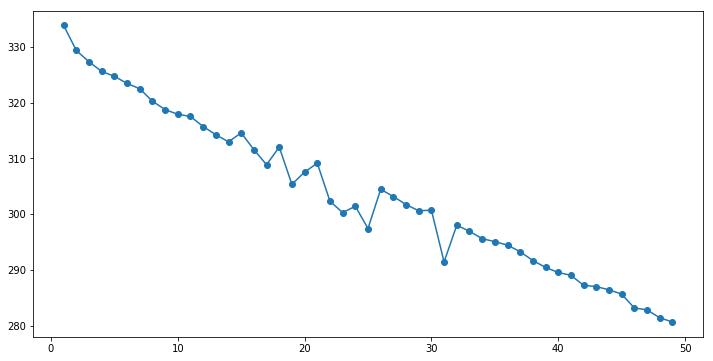

In [154]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Evaluation metric not converging --> there isn't a natural cluster.

In [160]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [169]:
clusters = km.labels_.tolist()

#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: 'cluster 0', 
                 1: 'cluster 1', 
                 2: 'cluster 2', 
                 3: 'cluster 3', 
                 4: 'cluster 4'}

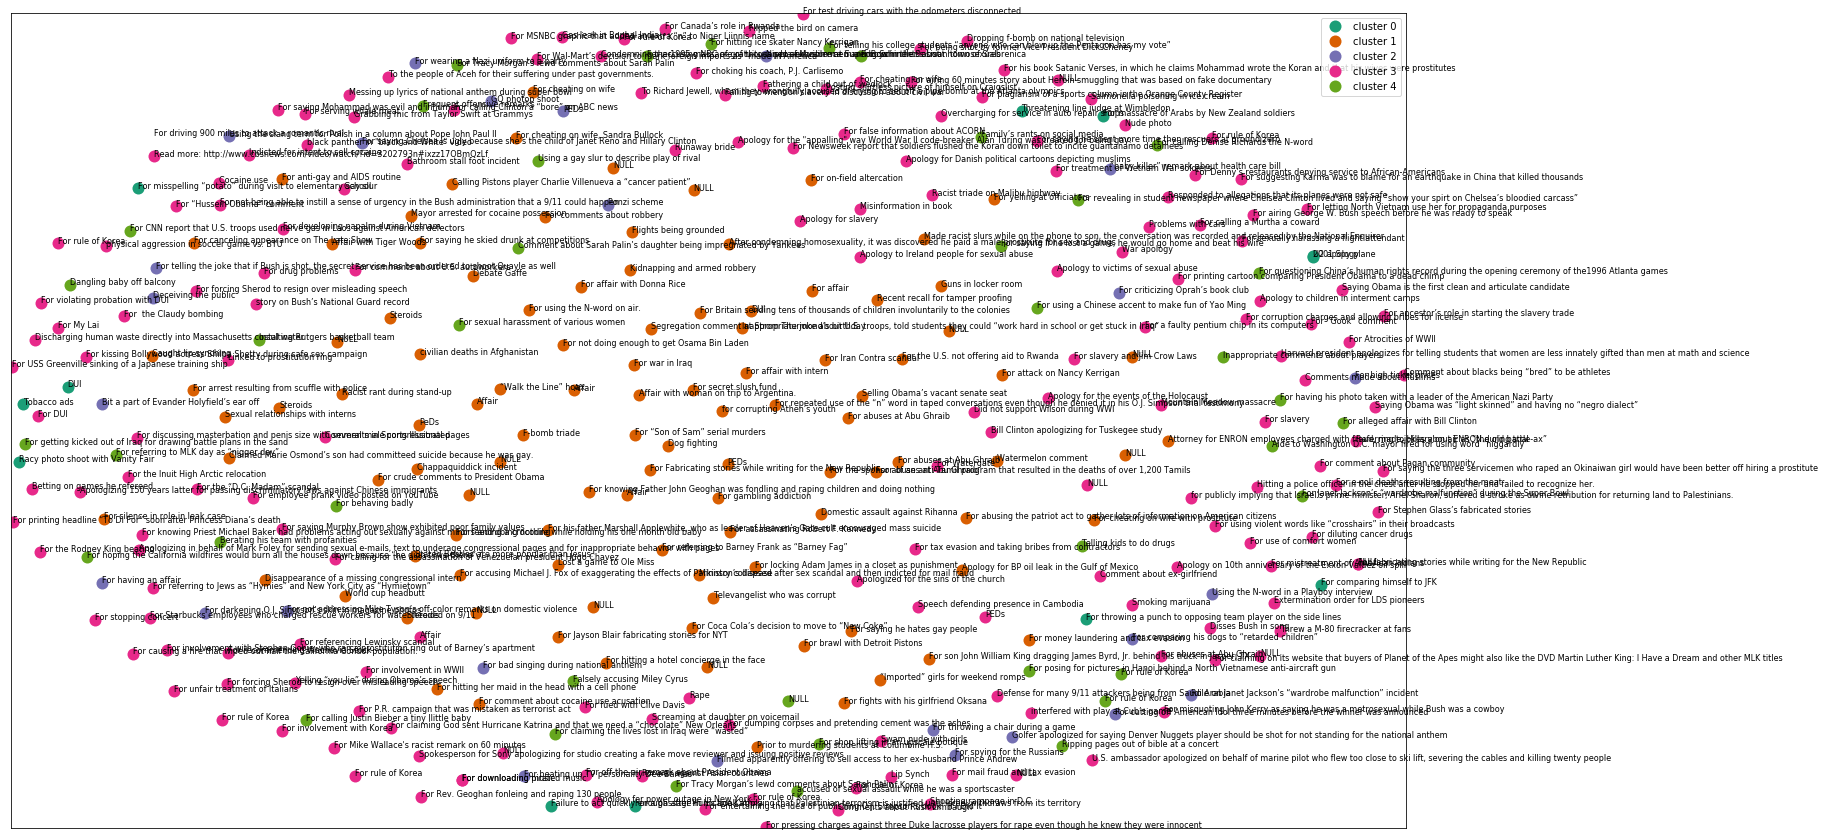

In [183]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, offense=offense)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(25, 15)) # set size
ax.margins(0.001) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['offense'], size=8)  

    
    
plt.show() #show the plot

fig.savefig("apologies_visual.pdf", bbox_inches='tight')

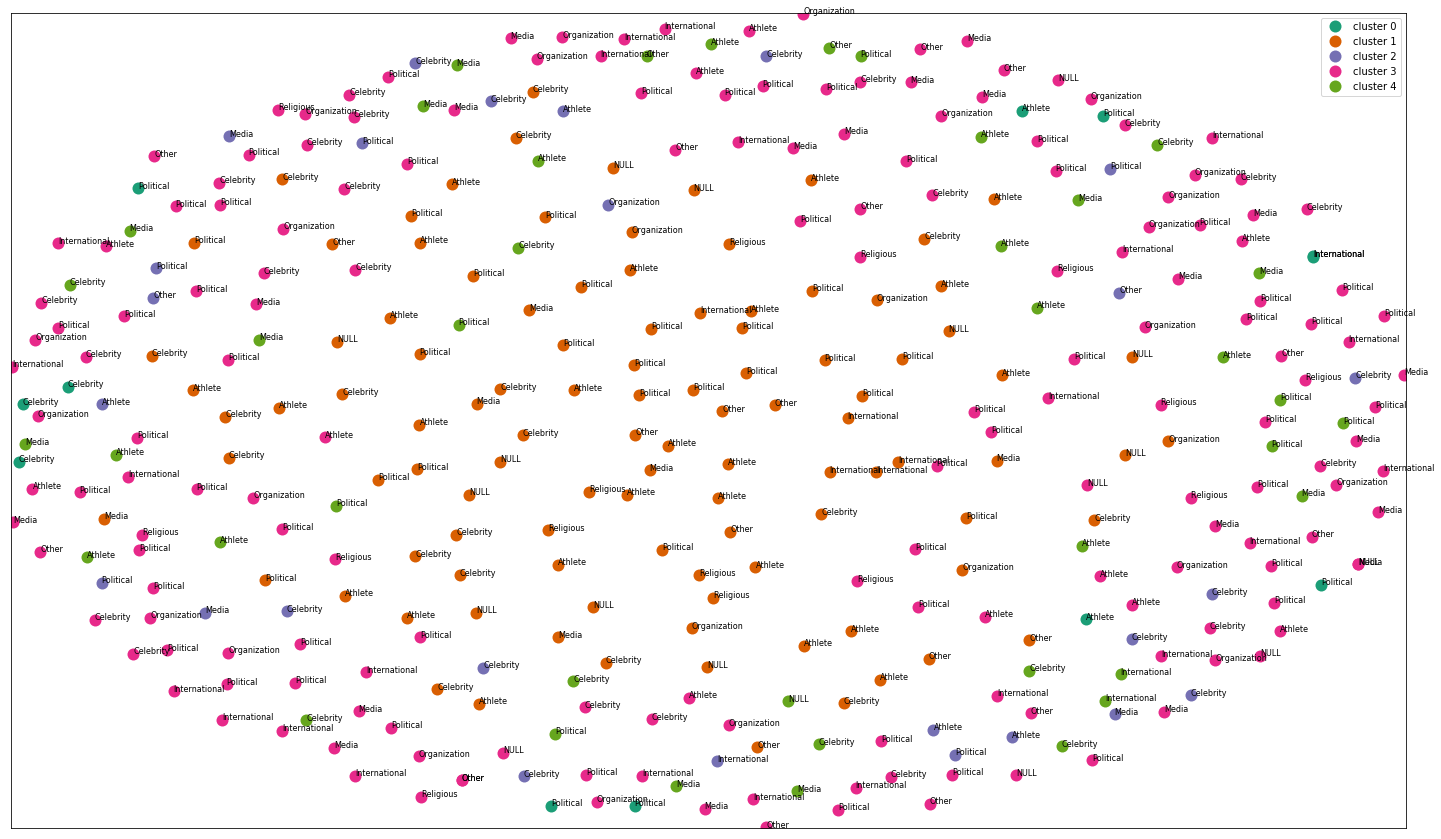

In [185]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, context=context)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(25, 15)) # set size
ax.margins(0.001) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['context'], size=8)  

    
    
plt.show() #show the plot

fig.savefig("apologies_context.pdf", bbox_inches='tight')

could look at some different embeddings that claim to distinguish between sentences

In [188]:
from sklearn.cluster import SpectralClustering

In [204]:
num_clusters = 5

In [200]:
sc = SpectralClustering(n_clusters=num_clusters, assign_labels="discretize",  random_state=0).fit(tfidf_matrix)

s_clusters = sc.labels_.tolist()

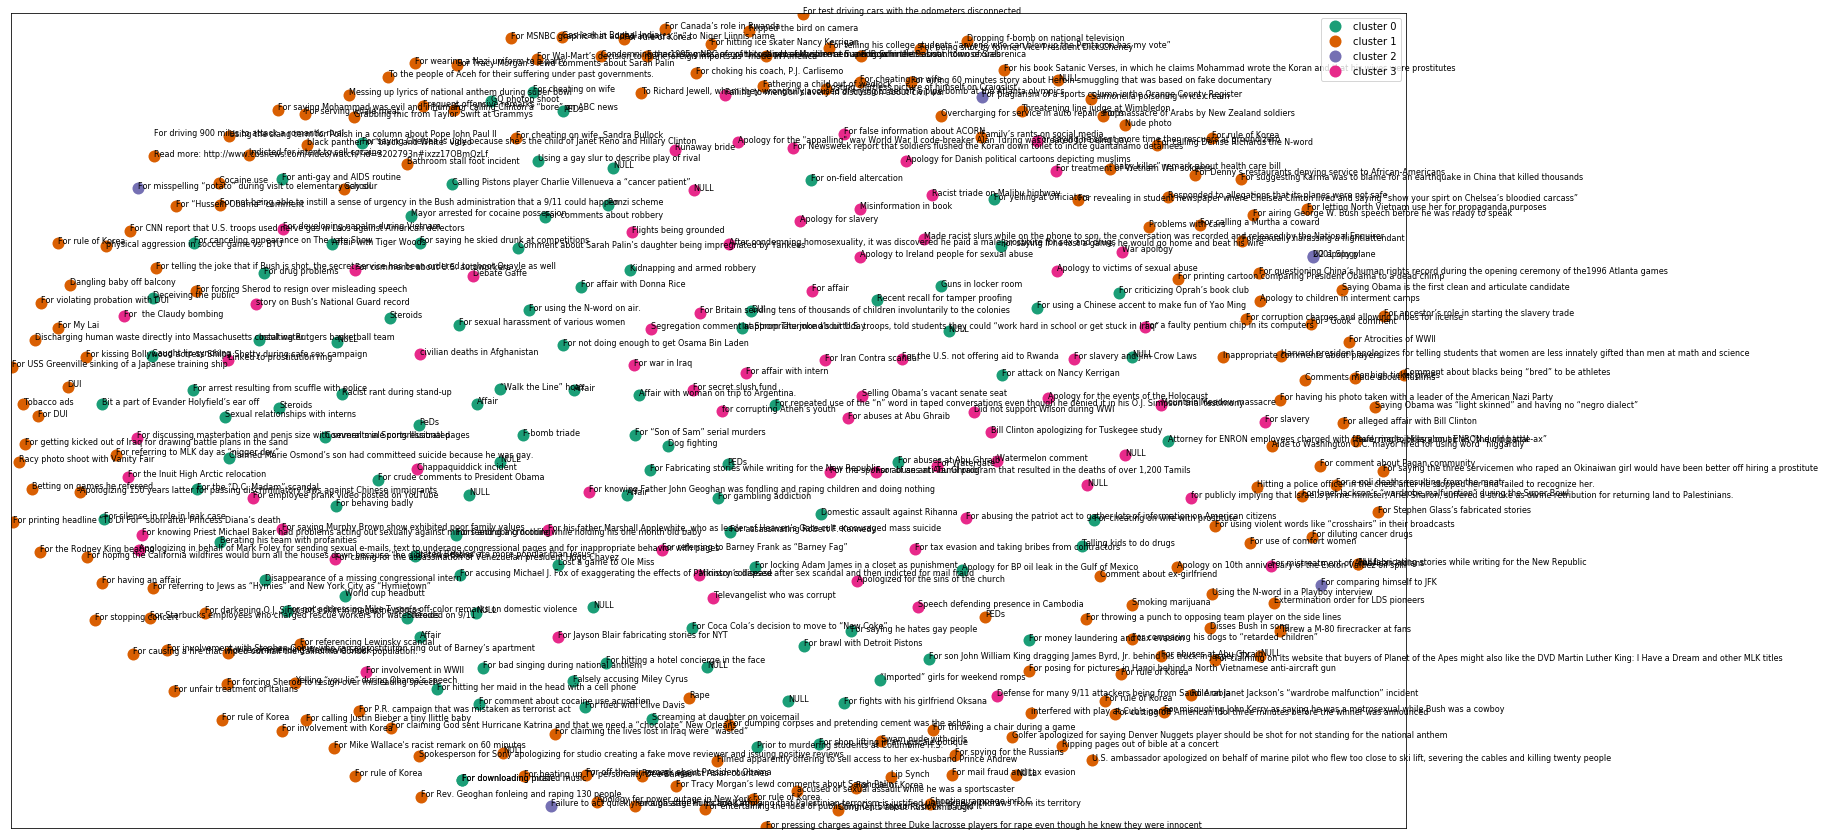

In [195]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=s_clusters, offense=offense)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(25, 15)) # set size
ax.margins(0.001) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['offense'], size=8)  

    
    
plt.show() #show the plot

#fig.savefig("apologies_visual.pdf", bbox_inches='tight')

In [206]:
documents_cleaned

[' mark sanford south carolina addressed extramarital affair june transcribed federal news service gov mark sanford okay you ready everybody ready i begin particular spot let start  i see  wheres gina smith staff shes here mr sanford shes here okay i conversation gina smith morning i arrived atlanta i told love appalachian trail and i used organize hiking trips actually i high school i would get soccer coach football coach act chaperone id get folks pay bucks each whatever was take trip wed go great adventures appalachian trail and i told adventure trips college  i campus representative eastern airlines could fly free meant id fly different places around world get job carry hundred dollars emergency money either find job locals come back come home told years congress early years governorship different adventure trips leaving traveling different places because i found job one desperately needs break bubble wherein every word every moment recorded  completely break and ive found true tri

In [214]:
from collections import Counter 

In [216]:
from __future__ import print_function
n = 30
print()
#sort cluster centers by proximity to centroid

for i in range(num_clusters):
    print( '\n\n **************** CLUSTER {} ****************'.format(i))
    
    print("\n\n MOST COMMONLY USED WORDS: ", end='')
    print(Counter(' '.join(list(df.ix[i]['text'])).split()).most_common(n))
        
    print("\n\n DESCRIPTION OF OFFENSE: ", end='')
    count = 0
    for offense in df.ix[i]['Offense']:
        if (count < 10):
            print(' %s,' % offense, end='')
            count += 1
        else:
            break
            
    print("\n\n CONTEXT: ", end='')
    count = {}
    for context in df.ix[i]['Context']:
        if context not in count:
            count[context] = 1
        else:
            count[context] += 1
    sorted_count = sorted(count, key=count.get, reverse=True)
    total = sum(count.values())
    print()
    for c in sorted_count:
        print(' %s (' % c + str(count[c]) + ' counts [{:.2%}]),'.format(count[c]/total), end='\n')
    
    print( '\n\n ********** END OF  CLUSTER {} **************'.format(i))
 






 **************** CLUSTER 0 ****************


 MOST COMMONLY USED WORDS: [('i', 30), ('regret', 13), ('women', 5), ('think', 4), ('apologize', 4), ('people', 3), ('sorry', 3), ('say', 3), ('make', 3), ('apology', 3), ('me', 3), ('want', 3), ('supported', 3), ('way', 3), ('made', 3)]


 DESCRIPTION OF OFFENSE:  Insulting Rutgers basketball team, Nude photo, For cheating on wife, For saying he skied drunk at competitions, Hitting a police officer in the chest after he stopped her and failed to recognize her. , For rule of Korea, For misquoting John Kerry as saying he was a metrosexual while Bush was a cowboy, Harvard president apologizes for telling students that women are less innately gifted than men at math and science, To Richard Jewell, whom they wrongfully accused of trying to set off a pipe bomb at the Atlanta olympics, For saying the three servicemen who raped an Okinaiwan girl would have been better off hiring a prostitute,

 CONTEXT: 
 Media (2 counts [20.00%]),
 Celebrity 

In [230]:
import sys

s_cluster_range = range(1, 10)

n = 30

for num_clusters in s_cluster_range:
    sc = SpectralClustering(n_clusters=num_clusters ).fit( tfidf_matrix )
    s_clusters = sc.labels_.tolist()
    
    WIP_sc = {'apology': list(apologies.keys()), 'text': documents_cleaned, 'cluster': s_clusters}
    frame = pd.DataFrame(WIP_sc , columns = ['apology', 'text', 'cluster'])

    offense = []
    for index, row in frame.iterrows():
        if row['apology'] in masterlist_ind.index:
            offense.append(masterlist_ind.loc[row['apology'],'Offense'])
        else:
            offense.append('NULL')

    context = []
    for index, row in frame.iterrows():
        if row['apology'] in masterlist_ind.index:
            context.append(masterlist_ind.loc[row['apology'],'Context'])
        else:
            context.append('NULL')

    df = frame.assign(Context=pd.Series(context).values)
    df = df.assign(Offense=pd.Series(offense).values)
    df = df.set_index('cluster')
    
    filename = str(num_clusters) + "_cluster_results.txt"
    sys.stdout = open(filename,"w")

    #sort cluster centers by proximity to centroid

    for i in range(num_clusters):
        print( '\n\n **************** CLUSTER {} ****************'.format(i))

        print("\n\n MOST COMMONLY USED WORDS: ", end='')
        print(Counter(' '.join(list(df.ix[i]['text'])).split()).most_common(n))

        print("\n\n DESCRIPTION OF OFFENSE: ", end='')
        count = 0
        for offense in df.ix[i]['Offense']:
            if (count < 10):
                print(' %s,' % offense, end='')
                count += 1
            else:
                break

        print("\n\n CONTEXT: ", end='')
        count = {}
        for context in df.ix[i]['Context']:
            if context not in count:
                count[context] = 1
            else:
                count[context] += 1
        sorted_count = sorted(count, key=count.get, reverse=True)
        total = sum(count.values())
        print('\n')
        
        for c in sorted_count:
            print(' %s (' % c + str(count[c]) + ' counts [{:.2%}]),'.format(count[c]/total), end='\n')

        print( '\n\n ********** END OF  CLUSTER {} **************'.format(i))

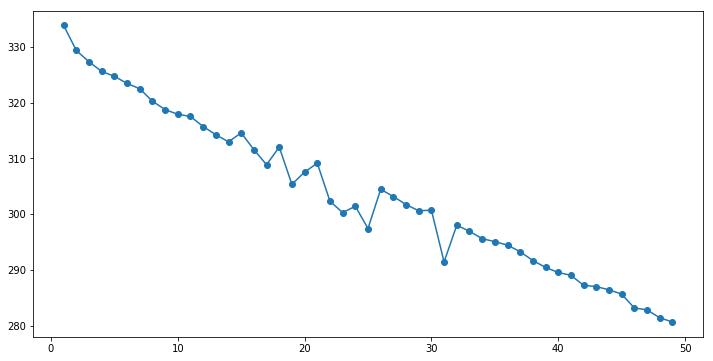

In [218]:
plt.figure(figsize=(12,6))
plt.plot( s_clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [236]:
df.ix[4]['text']

cluster
4                              s apology get pdf kevin
4                              s apology get pdf kevin
4             dan quayle potato incident see kevin pdf
4                   dan quayle vp debate see kevin pdf
4     bush katrina get pdf file kevin bushs stateme...
Name: text, dtype: object

In [77]:
def transcript_unavail(self):
    if 'pdf' in self:
        print (self) #for debugging
        return None
    return self

In [96]:
def remove_own_name(row):
    final = ''
    for w in row['text'].split():
        if not w in row['Apologizer'].lower():
            final += w + ' '
    return final

In [97]:
WIP = {'apology': list(apologies.keys()), 'text': list(documents_cleaned)}
frame = pd.DataFrame(WIP , columns = ['apology', 'text'])

offense = []
for index, row in frame.iterrows():
    if row['apology'] in masterlist_ind.index:
        offense.append(masterlist_ind.loc[row['apology'],'Offense'])
    else:
        offense.append('NULL')
        
context = []
for index, row in frame.iterrows():
    if row['apology'] in masterlist_ind.index:
        context.append(masterlist_ind.loc[row['apology'],'Context'])
    else:
        context.append('NULL')
        
apologizer = []
for index, row in frame.iterrows():
    if row['apology'] in masterlist_ind.index:
        apologizer.append(masterlist_ind.loc[row['apology'],'Apologizer'])
    else:
        apologizer.append('NULL')
        
df = frame.assign(Context=pd.Series(context).values)
df = df.assign(Offense=pd.Series(offense).values)
df = df.assign(Apologizer=pd.Series(apologizer).values)

df['text'] = df['text'].apply(transcript_unavail)
df = df.dropna()
df['text'] = df.apply(remove_own_name, axis=1)
df = df.dropna()

us apologyget pdf kevin
us apologyget pdf kevin
dan quayle kevin pdf
dan quayle kevin pdf
george w bush pdf file kevin bushs statements book decision points


In [188]:
df 

# https://stackoverflow.com/questions/31466769/add-column-of-empty-lists-to-dataframe

df['Strategy'] = [[]] * len(df)

In [131]:
df[df['Apologizer'] == "Barack Obama"]

,apology,text,Context,Offense,Apologizer,Strategy
120,121,president hey cameo appearance sit sit need he...,Political,For comments about robbery,Barack Obama,[]
323,326,wasted lives actually upset said never use ter...,Political,For claiming the lives lost in Iraq were “wasted”,Barack Obama,[]


In [133]:
df.iat[120,5] = ["Mortification", "Transcendence"]#index 120, column 6 (0-index)
df.iat[120,5]

['Mortification', 'Transcendence']

In [134]:
df[df['Apologizer'] == "Barney Frank"]

,apology,text,Context,Offense,Apologizer,Strategy
306,309,friends asked something dumb best answer give ...,Political,"For involvement with Stephen Gobie, who ran a ...",Barney Frank,[Mortification]


In [143]:
from tabulate import tabulate

In [150]:
name = input('Enter name: ')
while name != '':
    print(tabulate(df[df['Apologizer'] == name] ,headers='keys', tablefmt='plain'))
    name = input('Enter name: ')

Enter name:  Barney Frank


       apology  text                                                                                                                                                                                                                                                 Context    Offense                                                                                    Apologizer    Strategy
306        309  friends asked something dumb best answer give difficult time life dealing gay continuing meet public obligations created tremendous internal pressures pressures ended spoke publicly personal identity judgment improved since hope accept apology  Political  For involvement with Stephen Gobie, who ran a prostitution ring out of Barney’s apartment  Barney Frank  ['Mortification']


Enter name:  


In [216]:
# scraping

import requests
import lxml.html as lh
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np

In [ ]:
url = 'http://publicapologycentral.com/apologia-archive/political-2/'

#Create a handle, page, to handle the contents of the website
page = requests.get(url).text

soup = BeautifulSoup(page,'lxml')

table = soup.find('table',{'id': 'tablepress-1'})

indices = []
for name in set([t.text for t in table.find_all('a')]):
    ind = df[df['Apologizer'] == name].index.tolist()
    indices.append(ind)
    if sum(df['Apologizer'] == name) != 0:
        print(name + ' found at: ' + str(ind))

Marion Barry found at: [300]
Tom Coburn found at: [303]
Robert S. Mueller found at: [325]
Bob Packwood found at: [309]
David Vitter found at: [89]
Dan Quayle found at: [346]
Mark Sanford found at: [0]
Eliot Spitzer found at: [22]
Jack Abramoff found at: [315]
Christopher Lee found at: [328]
Richard Nixon found at: [59, 340, 345]
John McCain found at: [111, 122, 305]
John Edwards found at: [24]
Joe Biden found at: [20]
Trent Lott found at: [11]
Bill Clinton found at: [12, 51, 56, 58, 292]
Mark Foley found at: [319]
John Kerry found at: [81, 308]
Ted Kennedy found at: [102]
Barney Frank found at: [306]
Gary Condit found at: [343]
Larry Craig found at: [5]
Barack Obama found at: [120, 323]
Dick Armey found at: [307]
Harry Reid found at: [16]
Gerald Ford found at: [351]
Ronald Reagan found at: [333]
Joe Wilson found at: [13]
Jesse Jackson found at: [61, 110, 185]
Gary Hart found at: [311]


In [190]:
for ind in indices:
    for i in ind:
        print(df.iloc[i])
        strats =  input('Strategies? (Format like "a,b,c")').split(",")
        df.iat[i,5] = strats

apology                                                     303
text          lawyer said talking anything involving cocaine...
Context                                               Political
Offense                   Mayor arrested for cocaine possession
Apologizer                                         Marion Barry
Strategy                                                     []
Name: 300, dtype: object


Strategies? (Format like "a,b,c") Mortification, Corrective Action


apology                                                     306
text          feel terrible criticism nbc airing movie misin...
Context                                                   Other
Offense       For accusing NBC of gratuitous sex and violenc...
Apologizer                                           Tom Coburn
Strategy                                                     []
Name: 303, dtype: object


Strategies? (Format like "a,b,c") Mortification, Bolstering


apology                                                     328
text          fbi press conference inspector generals report...
Context                                               Political
Offense       For abusing the patriot act to gather lots of ...
Apologizer                                    Robert S. Mueller
Strategy                                                     []
Name: 325, dtype: object


Strategies? (Format like "a,b,c") Mortification, Corrective Action, Differentiation, Minimization


apology                                                     312
text          comments actions indeed unwelcome conducted wa...
Context                                               Political
Offense                  For sexual harassment of various women
Apologizer                                         Bob Packwood
Strategy                                                     []
Name: 309, dtype: object


Strategies? (Format like "a,b,c") Bolstering, Mortification, Good Intentions, Defeasibility


apology                                                      90
text          want offer deep sincerest apologies let disapp...
Context                                               Political
Offense                            For the “D.C. Madam” scandal
Apologizer                                         David Vitter
Strategy                                                     []
Name: 89, dtype: object


Strategies? (Format like "a,b,c") Mortification, Corrective Action, Bolstering, Attacking the Accuser


apology                                                     351
text          murphy brown caused quite stir criticizing tel...
Context                                               Political
Offense       For saying Murphy Brown show exhibited poor fa...
Apologizer                                           Dan Quayle
Strategy                                                     []
Name: 346, dtype: object


Strategies? (Format like "a,b,c") Transcendence, Bolstering, Attacking the Accuser


apology                                                       1
text          press june transcript press gov south carolina...
Context                                               Political
Offense                Affair with woman on trip to Argentina. 
Apologizer                                         Mark Sanford
Strategy                                                     []
Name: 0, dtype: object


Strategies? (Format like "a,b,c") Mortification, Corrective Action, Minimization


apology                                                      23
text          past nine years eight attorney general one gov...
Context                                               Political
Offense                             Linked to prostitution ring
Apologizer                                        Eliot Spitzer
Strategy                                                     []
Name: 22, dtype: object


Strategies? (Format like "a,b,c") Mortification, Corrective Action, Bolstering


apology                                                     318
text          honor words able ever express sorry profound r...
Context                                               Political
Offense                          For mail fraud and tax evasion
Apologizer                                        Jack Abramoff
Strategy                                                     []
Name: 315, dtype: object


Strategies? (Format like "a,b,c") Mortification, Corrective Action, Bolstering


apology                                                     331
text          immediate release wednesday february congressm...
Context                                               Political
Offense       Posting shirtless picture of himself on Craigs...
Apologizer                                      Christopher Lee
Strategy                                                     []
Name: 328, dtype: object


Strategies? (Format like "a,b,c") Mortification, Corrective Action


apology                                                      60
text          evening time spoken office many decisions made...
Context                                               Political
Offense                                           For Watergate
Apologizer                                        Richard Nixon
Strategy                                                     []
Name: 59, dtype: object


Strategies? (Format like "a,b,c") Shifting the Blame, Bolstering, Minimization


apology                                                     343
text          slush fellow americansi come tonight candidate...
Context                                               Political
Offense                                   For secret slush fund
Apologizer                                        Richard Nixon
Strategy                                                     []
Name: 340, dtype: object


Strategies? (Format like "a,b,c") Denial, Attacking the Accuser, Bolstering


apology                                                     350
text          increasing troops evening fellow americans ten...
Context                                               Political
Offense                   Speech defending presence in Cambodia
Apologizer                                        Richard Nixon
Strategy                                                     []
Name: 345, dtype: object


Strategies? (Format like "a,b,c") 


apology                                                     112
text          understanding came uh uh person program spoke ...
Context                                               Political
Offense                             For “Hussein Obama” comment
Apologizer                                          John McCain
Strategy                                                     []
Name: 111, dtype: object


Strategies? (Format like "a,b,c") 


apology                                                     123
text          mccaini continue condemn unfairly mistreated u...
Context                                               Political
Offense                                      For “Gook” comment
Apologizer                                          John McCain
Strategy                                                     []
Name: 122, dtype: object


Strategies? (Format like "a,b,c") 


apology                                                     308
text          mccaini made unfortunate insensitive remark wr...
Context                                               Political
Offense       For saying Chelsea is ugly because she’s the c...
Apologizer                                          John McCain
Strategy                                                     []
Name: 305, dtype: object


Strategies? (Format like "a,b,c") 


apology                                                      25
text          made serious error judgment conducted way disl...
Context                                               Political
Offense                                                  Affair
Apologizer                                         John Edwards
Strategy                                                     []
Name: 24, dtype: object


Strategies? (Format like "a,b,c") Mortification, Corrective Action, Bolstering, Defeasibility, Denial


apology                                                      21
text          deeply regret offense remark new york observer...
Context                                               Political
Offense       Saying Obama is the first clean and articulate...
Apologizer                                            Joe Biden
Strategy                                                     []
Name: 20, dtype: object


Strategies? (Format like "a,b,c") Mortification, Good Intentions


apology                                                      12
text          first thank giving opportunity comment number ...
Context                                               Political
Offense        Segregation comment at Strom Thurmond’s birthday
Apologizer                                           Trent Lott
Strategy                                                     []
Name: 11, dtype: object


Strategies? (Format like "a,b,c") Mortification, Bolstering, Denial


apology                                                      13
text          rwanda mr president first let thank mr preside...
Context                                               Political
Offense                 For the U.S. not offering aid to Rwanda
Apologizer                                         Bill Clinton
Strategy                                                     []
Name: 12, dtype: object


Strategies? (Format like "a,b,c") Mortification, Corrective Action


apology                                                      52
text          president ladies gentlemen sunday mr shaw cele...
Context                                               Political
Offense             Bill Clinton apologizing for Tuskegee study
Apologizer                                         Bill Clinton
Strategy                                                     []
Name: 51, dtype: object


Strategies? (Format like "a,b,c") Mortification, Corrective Action


apology                                                      57
text          years ago united states government unjustly ma...
Context                                               Political
Offense                 Apology to children in interment camps 
Apologizer                                         Bill Clinton
Strategy                                                     []
Name: 56, dtype: object


Strategies? (Format like "a,b,c") Mortification, Corrective Action


apology                                                      59
text          much ladies gentlemen welcome white house day ...
Context                                               Political
Offense                                  For affair with intern
Apologizer                                         Bill Clinton
Strategy                                                     []
Name: 58, dtype: object


Strategies? (Format like "a,b,c") Mortification, Denial, Transcendence, Corrective Action


apology                                                     295
text          regarding efforts get bin news sunday intervie...
Context                                               Political
Offense             For not doing enough to get Osama Bin Laden
Apologizer                                         Bill Clinton
Strategy                                                     []
Name: 292, dtype: object


Strategies? (Format like "a,b,c") Good Intentions, Attacking the Accuser


apology                                                     322
text          today delivered letter speaker house informing...
Context                                               Political
Offense       For discussing masterbation and penis size wit...
Apologizer                                           Mark Foley
Strategy                                                     []
Name: 319, dtype: object


Strategies? (Format like "a,b,c") Mortification, Denial, Corrective Action, Shifting Blame


apology                                                      82
text          first apology given press let make crystal cle...
Context                                               Political
Offense       Inappropriate joke about U.S. troops, told stu...
Apologizer                                           John Kerry
Strategy                                                     []
Name: 81, dtype: object


Strategies? (Format like "a,b,c") Accident, Attacking the Accuser, Bolstering


apology                                                     311
text           shouldnt repeated story inappropriate apologize 
Context                                               Political
Offense       For telling the joke that if Bush is shot, the...
Apologizer                                           John Kerry
Strategy                                                     []
Name: 308, dtype: object


Strategies? (Format like "a,b,c") Accident, Attacking the Accuser, Bolstering


apology                                                     103
text          fellow citizensi requested opportunity talk pe...
Context                                               Political
Offense                                 Chappaquiddick incident
Apologizer                                          Ted Kennedy
Strategy                                                     []
Name: 102, dtype: object


Strategies? (Format like "a,b,c") Defeasibility, Denial, Mortification, Bolstering


apology                                                     309
text          friends asked something dumb best answer give ...
Context                                               Political
Offense       For involvement with Stephen Gobie, who ran a ...
Apologizer                                         Barney Frank
Strategy                                                     []
Name: 306, dtype: object


Strategies? (Format like "a,b,c") Defeasibility


apology                                                     348
text          transcript rep gave connie chung live congress...
Context                                               Political
Offense         Disappearance of a missing congressional intern
Apologizer                                          Gary Condit
Strategy                                                     []
Name: 343, dtype: object


Strategies? (Format like "a,b,c") Denial, Bolstering, Mortification


apology                                                       6
text          please let apologize family friends staff fell...
Context                                               Political
Offense                            Bathroom stall foot incident
Apologizer                                          Larry Craig
Strategy                                                     []
Name: 5, dtype: object


Strategies? (Format like "a,b,c") Denial, Attacking the Accuser


apology                                                     121
text          president hey cameo appearance sit sit need he...
Context                                               Political
Offense                              For comments about robbery
Apologizer                                         Barack Obama
Strategy                                                     []
Name: 120, dtype: object


Strategies? (Format like "a,b,c") Mortification, Transcendence


apology                                                     326
text          wasted lives actually upset said never use ter...
Context                                               Political
Offense       For claiming the lives lost in Iraq were “wasted”
Apologizer                                         Barack Obama
Strategy                                                     []
Name: 323, dtype: object


Strategies? (Format like "a,b,c") 


apology                                                     310
text          ask unanimous consent address house five minut...
Context                                               Political
Offense           For referring to Barney Frank as “Barney Fag”
Apologizer                                           Dick Armey
Strategy                                                     []
Name: 307, dtype: object


Strategies? (Format like "a,b,c") Accident, Attacking the Accuser, Bolstering, Mortification


apology                                                      17
text          deeply regret using poor choice words sincerel...
Context                                               Political
Offense       Saying Obama was “light skinned” and having no...
Apologizer                                           Harry Reid
Strategy                                                     []
Name: 16, dtype: object


Strategies? (Format like "a,b,c") Mortification, Bolstering


apology                                                     357
text          im lehrer lets go second debate one san franci...
Context                                               Political
Offense                                            Debate Gaffe
Apologizer                                          Gerald Ford
Strategy                                                     []
Name: 351, dtype: object


Strategies? (Format like "a,b,c") Transcendence, Attacking the Accuser


apology                                                     336
text          iran fellow americans ive spoken historic offi...
Context                                               Political
Offense                                 For Iran Contra scandal
Apologizer                                        Ronald Reagan
Strategy                                                     []
Name: 333, dtype: object


Strategies? (Format like "a,b,c") Good Intentions, Mortification, Corrective Action


apology                                                      14
text          reflected comment president obama address body...
Context                                               Political
Offense                 Yelling “you lie” during Obama’s speech
Apologizer                                           Joe Wilson
Strategy                                                     []
Name: 13, dtype: object


Strategies? (Format like "a,b,c") Mortification, Defeasibility


apology                                                      62
text          campaign ive tried offer leadership democratic...
Context                                               Political
Offense       For referring to Jews as “Hymies” and New York...
Apologizer                                        Jesse Jackson
Strategy                                                     []
Name: 61, dtype: object


Strategies? (Format like "a,b,c") 


apology                                                     111
text          lemon cnn anchor well said earlier going talk ...
Context                                               Political
Offense                   For crude comments to President Obama
Apologizer                                        Jesse Jackson
Strategy                                                     []
Name: 110, dtype: object


Strategies? (Format like "a,b,c") Mortification, Bolstering, Differentiation


apology                                                     186
text          july harm hurt hot private conversation may ca...
Context                                               Political
Offense            For off-the-air remark about President Obama
Apologizer                                        Jesse Jackson
Strategy                                                     []
Name: 185, dtype: object


Strategies? (Format like "a,b,c") Mortification, Bolstering, Differentiation


apology                                                     314
text          go first tonight interview former colorado sen...
Context                                               Political
Offense                              For affair with Donna Rice
Apologizer                                            Gary Hart
Strategy                                                     []
Name: 311, dtype: object


Strategies? (Format like "a,b,c") Mortification, Attacking the Accuser, Bolstering


In [195]:
# helping with coding strategies

url = 'https://publicapologycentral.com/apologia-archive/sports-2/'

#Create a handle, page, to handle the contents of the website
page = requests.get(url).text

soup = BeautifulSoup(page,'lxml')

table = soup.find('table',{'id': 'tablepress-4'})

indices = []
for name in set([t.text for t in table.find_all('a')]):
    ind = df[df['Apologizer'] == name].index.tolist()
    indices.append(ind)
    if sum(df['Apologizer'] == name) != 0:
        print(name + ' found at: ' + str(ind))
        
for ind in indices:
    for i in ind:
        print(df.iloc[i])
        strats =  input('Strategies? (Format like "a,b,c")').split(",")
        df.iat[i,5] = strats

Mark McGwire found at: [2]
Michael Vick found at: [17]
Mike Leach found at: [332]
Marion Jones found at: [36]
Latrell Sprewell found at: [283]
Tiger Woods found at: [1]
Mike Tyson found at: [157]
apology                                                       3
text          become hitting coach st louis cardinals chance...
Context                                                 Athlete
Offense                                                Steroids
Apologizer                                         Mark McGwire
Strategy                                                     []
Name: 2, dtype: object


Strategies? (Format like "a,b,c") Mortification, Defeasibility, Differentiation


apology                                                      18
text          life ive football player public speaker know r...
Context                                                 Athlete
Offense                                            Dog fighting
Apologizer                                         Michael Vick
Strategy                                                     []
Name: 17, dtype: object


Strategies? (Format like "a,b,c") Mortification, Corrective Action


apology                                                     335
text          davis situation unfolded rapidly texas tech un...
Context                                                 Athlete
Offense        For locking Adam James in a closet as punishment
Apologizer                                           Mike Leach
Strategy                                                     []
Name: 332, dtype: object


Strategies? (Format like "a,b,c") Denial, Attacking the Accuser, Bolstering


apology                                                      37
text          afternoon everyone today something important t...
Context                                                 Athlete
Offense                                                Steroids
Apologizer                                         Marion Jones
Strategy                                                     []
Name: 36, dtype: object


Strategies? (Format like "a,b,c") Mortification, Bolstering


apology                                                     286
text          lexisnexis related topics full article related...
Context                                                 Athlete
Offense                   For choking his coach, P.J. Carlisemo
Apologizer                                     Latrell Sprewell
Strategy                                                     []
Name: 283, dtype: object


Strategies? (Format like "a,b,c") Attacking the Accuser, Minimization, Provocation, Mortification


apology                                                       2
text          morning thank joining room friends many room k...
Context                                                 Athlete
Offense                                                  Affair
Apologizer                                          Tiger Woods
Strategy                                                     []
Name: 1, dtype: object


Strategies? (Format like "a,b,c") Mortification, Corrective Action


apology                                                     158
text          oprah cause bit twice yeah um didnt feel guilt...
Context                                                 Athlete
Offense               Bit a part of Evander Holyfield’s ear off
Apologizer                                           Mike Tyson
Strategy                                                     []
Name: 157, dtype: object


Strategies? (Format like "a,b,c") Mortification, Defeasibility, Provocation, Bolstering


In [197]:
# helping with coding strategies

url = 'http://publicapologycentral.com/apologia-archive/celebrity-2/'

#Create a handle, page, to handle the contents of the website
page = requests.get(url).text

soup = BeautifulSoup(page,'lxml')

table = soup.find('table',{'id': 'tablepress-3'})

indices = []
for name in set([t.text for t in table.find_all('a')]):
    ind = df[df['Apologizer'] == name].index.tolist()
    indices.append(ind)
    if sum(df['Apologizer'] == name) != 0:
        print(name + ' found at: ' + str(ind))
        
for ind in indices:
    for i in ind:
        print(df.iloc[i])
        strats =  input('Strategies? (Format like "a,b,c")').split(",")
        df.iat[i,5] = strats

Christina Aguilera found at: [342]
Michael Jackson found at: [93, 293]
Christian Bale found at: [8]
Hugh Grant found at: [272]
Mel Gibson found at: [10, 331]
Jane Fonda found at: [69, 271]
Michael Richards found at: [7]
Milli Vanilli found at: [91]
Janet Jackson found at: [94]
Dr. Dre found at: [196]
Chris Brown found at: [23]
Richard Gere found at: [50]
Kanye West found at: [6]
David Letterman found at: [14, 15]
apology                                                     345
text          got caught moment song lost place hope everyon...
Context                                               Celebrity
Offense       Messing up lyrics of national anthem during su...
Apologizer                                   Christina Aguilera
Strategy                                                     []
Name: 342, dtype: object


Strategies? (Format like "a,b,c") Accident, Transcendence


apology                                                      94
text          made terrible mistakei got caught excitement w...
Context                                               Celebrity
Offense                               Dangling baby off balcony
Apologizer                                      Michael Jackson
Strategy                                                     []
Name: 93, dtype: object


Strategies? (Format like "a,b,c") Defeasibility, Mortification, Good Intentions


apology                                                     296
text          upsets think black white could influence child...
Context                                               Celebrity
Offense                black panther in "black and White" video
Apologizer                                      Michael Jackson
Strategy                                                     []
Name: 293, dtype: object


Strategies? (Format like "a,b,c") 


apology                                                       9
text          thing really want stress confusion whatsoever ...
Context                                               Celebrity
Offense                                           F-bomb triade
Apologizer                                       Christian Bale
Strategy                                                     []
Name: 8, dtype: object


Strategies? (Format like "a,b,c") Mortification, Minimization, Bolstering


apology                                                     275
text          ive done thing declared atrocious thing give t...
Context                                               Celebrity
Offense                    For cheating on wife with prostitute
Apologizer                                           Hugh Grant
Strategy                                                     []
Name: 272, dtype: object


Strategies? (Format like "a,b,c") Mortification


apology                                                      11
text          excuse tolerance anyone thinks expresses kind ...
Context                                               Celebrity
Offense                         Racist triade on Malibu highway
Apologizer                                           Mel Gibson
Strategy                                                     []
Name: 10, dtype: object


Strategies? (Format like "a,b,c") Defeasibility, Mortification


apology                                                     334
text          domestic violence girlfriend please call want ...
Context                                               Celebrity
Offense                   For fights with his girlfriend Oksana
Apologizer                                           Mel Gibson
Strategy                                                     []
Name: 331, dtype: object


Strategies? (Format like "a,b,c") 


apology                                                      70
text                                         sorry sitting gun 
Context                                               Celebrity
Offense       For letting North Vietnam use her for propagan...
Apologizer                                           Jane Fonda
Strategy                                                     []
Name: 69, dtype: object


Strategies? (Format like "a,b,c") Mortification, Defeasibility, Bolstering, Corrective Action


apology                                                     274
text          would like say something vietnam veterans new ...
Context                                               Celebrity
Offense       For posing for pictures in Hanoi behind a Nort...
Apologizer                                           Jane Fonda
Strategy                                                     []
Name: 271, dtype: object


Strategies? (Format like "a,b,c") Mortification, Defeasibility, Bolstering, Corrective Action


apology                                                       8
text          know im really im sorry people audience blacks...
Context                                               Celebrity
Offense                             Racist rant during stand-up
Apologizer                                     Michael Richards
Strategy                                                     []
Name: 7, dtype: object


Strategies? (Format like "a,b,c") Mortification, Provocation, Defeasibility


apology                                                      92
text          give grammy back brent davis real singers get ...
Context                                               Celebrity
Offense                                               Lip Synch
Apologizer                                        Milli Vanilli
Strategy                                                     []
Name: 91, dtype: object


Strategies? (Format like "a,b,c") Shifting Blame, Good Intentions


apology                                                      95
text          decision change super bowl performance actuall...
Context                                               Celebrity
Offense                           Nipple exposure at Super Bowl
Apologizer                                        Janet Jackson
Strategy                                                     []
Name: 94, dtype: object


Strategies? (Format like "a,b,c") Mortification, Accident


apology                                                     197
text          talk shit know somebody expletive im gonna exp...
Context                                               Celebrity
Offense               For beating up TV personality Dee Barnes 
Apologizer                                              Dr. Dre
Strategy                                                     []
Name: 196, dtype: object


Strategies? (Format like "a,b,c") Minimization, Provocation, Mortification, Corrective Action


apology                                                      24
text          im since february attorney advised speak even ...
Context                                               Celebrity
Offense                        Domestic assault against Rihanna
Apologizer                                          Chris Brown
Strategy                                                     []
Name: 23, dtype: object


Strategies? (Format like "a,b,c") Mortification, Corrective Action, Bolstering


apology                                                      51
text          apologize people india especially recent behav...
Context                                               Celebrity
Offense       For kissing Bollywood actress Shilpa Shetty du...
Apologizer                                         Richard Gere
Strategy                                                     []
Name: 50, dtype: object


Strategies? (Format like "a,b,c") Good Intentions, Mortification, Attacking the Accuser


apology                                                       7
text          extremely difficult dealing fact hurt someone ...
Context                                               Celebrity
Offense               Grabbing mic from Taylor Swift at Grammys
Apologizer                                           Kanye West
Strategy                                                     []
Name: 6, dtype: object


Strategies? (Format like "a,b,c") Mortification, Transcendence, Bolstering, Corrective Action


apology                                                      15
text          sarah palin right ive thinking situation gover...
Context                                               Celebrity
Offense       Comment about Sarah Palin’s daughter being imp...
Apologizer                                      David Letterman
Strategy                                                     []
Name: 14, dtype: object


Strategies? (Format like "a,b,c") Defeasibility, Good Intentions, Mortification


apology                                                      16
text          terribly sorry put staff position inadvertentl...
Context                                               Celebrity
Offense                       Sexual relationships with interns
Apologizer                                      David Letterman
Strategy                                                     []
Name: 15, dtype: object


Strategies? (Format like "a,b,c") Differentiation, Good Intentions, Transcendence


In [210]:
sum(df['Strategy'].apply(len) > 0) #73 labelled

73

In [208]:
# helping with coding strategies

url = 'http://publicapologycentral.com/apologia-archive/corporate-2/'

#Create a handle, page, to handle the contents of the website
page = requests.get(url).text

soup = BeautifulSoup(page,'lxml')

table = soup.find('table',{'id': 'tablepress-2'})

indices = []
for name in set([t.text for t in table.find_all('a')]):
    ind = df[df['Apologizer'] == name].index.tolist()
    indices.append(ind)
    if sum(df['Apologizer'] == name) != 0:
        print(name + ' found at: ' + str(ind))
        
for ind in indices:
    for i in ind:
        print(df.iloc[i])
        strats =  input('Strategies? (Format like "a,b,c")').split(",")
        df.iat[i,5] = strats

Jack in the Box found at: [348]
New York Times found at: [95]
Starbucks found at: [248]
AT&T found at: [336]
Union Carbide found at: [334]
Bernard Madoff found at: [119]
apology                                                     354
text          point reluctant say contaminated simply want s...
Context                                            Organization
Offense               For e-coli deaths resulting from the meat
Apologizer                                      Jack in the Box
Strategy                                                     []
Name: 348, dtype: object


Strategies? (Format like "a,b,c") Shifting Responsibility, Bolstering, Corrective Action


apology                                                      96
text          reporter committed frequent acts journalistic ...
Context                                                   Media
Offense            For Jayson Blair fabricating stories for NYT
Apologizer                                       New York Times
Strategy                                                     []
Name: 95, dtype: object


Strategies? (Format like "a,b,c") 


apology                                                     251
text          deeply distressed september following terroris...
Context                                            Organization
Offense       For Starbucks employees who charged rescue wor...
Apologizer                                            Starbucks
Strategy                                                     []
Name: 248, dtype: object


Strategies? (Format like "a,b,c") Mortification, Corrective Action


apology                                                     339
text          sept failure result flaw system rather resulte...
Context                                            Organization
Offense                    Apology for power outage in New York
Apologizer                                                 AT&T
Strategy                                                     []
Name: 336, dtype: object


Strategies? (Format like "a,b,c") Mortification, Corrective Action, Bolstering


apology                                                     337
text          corporation regarding bhopal gas leak bhopal t...
Context                                            Organization
Offense                                Gas leak in Bophal India
Apologizer                                        Union Carbide
Strategy                                                     []
Name: 334, dtype: object


Strategies? (Format like "a,b,c") Mortification, Corrective Action, Shifting Blame


apology                                                     120
text          honor cannot offer excuse behavior excuse thou...
Context                                            Organization
Offense                                            Ponzi scheme
Apologizer                                       Bernard Madoff
Strategy                                                     []
Name: 119, dtype: object


Strategies? (Format like "a,b,c") Mortification


In [248]:
indices = []
for index, row in df.iterrows():
    if len(row['Strategy']) > 0 and row['Strategy'][0]: #second part is false if empty string
        #print('currently...' + str(row['Strategy']))
        indices.append(index)

In [250]:
strat_labeled_df = df.iloc[indices, :]

In [270]:
indices = []
strat_count = {}
strat_count['Shifting Responsibility'] = 0
for index, row in strat_labeled_df.iterrows():
    for s in row['Strategy']:
        curr = s.strip()
        if curr not in strat_count and curr[:8] != "Shifting":
            strat_count[curr] = 1
        elif curr[:8] == "Shifting":
            strat_count['Shifting Responsibility'] += 1
        else:
            strat_count[curr] += 1

strat_count

{'Shifting Responsibility': 5,
 'Mortification': 50,
 'Corrective Action': 25,
 'Minimization': 6,
 'Defeasibility': 13,
 'Differentiation': 5,
 'Denial': 9,
 'Attacking the Accuser': 13,
 'Transcendence': 7,
 'Bolstering': 29,
 'Provocation': 4,
 'Good Intentions': 9,
 'Accident': 5}

In [271]:
from collections import OrderedDict
from operator import itemgetter

In [272]:
strat_count_sort = OrderedDict(sorted(strat_count.items(),key=itemgetter(1), reverse=True))

In [273]:
strat_count_sort

OrderedDict([('Mortification', 50),
             ('Bolstering', 29),
             ('Corrective Action', 25),
             ('Defeasibility', 13),
             ('Attacking the Accuser', 13),
             ('Denial', 9),
             ('Good Intentions', 9),
             ('Transcendence', 7),
             ('Minimization', 6),
             ('Shifting Responsibility', 5),
             ('Differentiation', 5),
             ('Accident', 5),
             ('Provocation', 4)])

8